# Create the Hybrid Catalgoue

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyoorb as oo

In [2]:
plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

%config InlineBackend.figure_format = "retina"

## Get the original catalgoues

In [3]:
def get_catalogues(s3m_path="catalogues/s3m_propagated.h5",
                   mpcorb_path="catalogues/mpcorb_propagated.h5"):
    
    s3m = pd.read_hdf(s3m_path, key="df")
    mpcorb = pd.read_hdf(mpcorb_path, key="df")
    return s3m, mpcorb

In [4]:
s3m, mpcorb = get_catalogues()

## Make a list of things to delete and combine catalogues

In [5]:
delete_these = []

In [6]:
H_bins = np.arange(-2, 28 + 1)
for left, right in zip(H_bins[:-1], H_bins[1:]):
    matched = np.load("output/matched_{}_{}.npy".format(left, right))
    delete_these.extend(matched)

In [7]:
hybrid = s3m.drop(delete_these, axis=0)
hybrid = pd.concat([hybrid, mpcorb])

In [33]:
len(delete_these)

1113146

## Ah, we want everything back in Keplerian

In [8]:
oo.pyoorb.oorb_init()

0

In [9]:
element_types = ["CART", "COM", "KEP"]

In [50]:
mpcorb_orbits = np.array(
    np.array([
        np.linspace(0, len(mpcorb) - 1, len(mpcorb)),
        mpcorb.x,
        mpcorb.y,
        mpcorb.z,
        mpcorb.vx,
        mpcorb.vy,
        mpcorb.vz,
        np.repeat(element_types.index("CART") + 1, len(mpcorb)).astype(int),
        np.repeat(59549, len(mpcorb)).astype(int),
        np.repeat(3, len(mpcorb)).astype(int),
        mpcorb.H,
        mpcorb.g
    ]).transpose(),
dtype=np.double, order='F')

In [10]:
hybrid_orbits = np.array(
    np.array([
        np.linspace(0, len(hybrid) - 1, len(hybrid)),
        hybrid.x,
        hybrid.y,
        hybrid.z,
        hybrid.vx,
        hybrid.vy,
        hybrid.vz,
        np.repeat(element_types.index("CART") + 1, len(hybrid)).astype(int),
        np.repeat(59549, len(hybrid)).astype(int),
        np.repeat(3, len(hybrid)).astype(int),
        hybrid.H,
        hybrid.g
    ]).transpose(),
dtype=np.double, order='F')

In [11]:
hybrid_orbits

array([[ 0.00000000e+00,  1.68540167e+00, -5.19250451e-01, ...,
         3.00000000e+00,  1.03150000e+01,  1.50000000e-01],
       [ 1.00000000e+00,  3.58960064e+00,  4.25668883e+00, ...,
         3.00000000e+00,  1.08180000e+01,  1.50000000e-01],
       [ 2.00000000e+00,  6.98137690e-01,  2.74369694e+00, ...,
         3.00000000e+00,  1.11750000e+01,  1.50000000e-01],
       ...,
       [ 1.44111090e+07, -3.95000157e+01, -1.29616338e+01, ...,
         3.00000000e+00,  8.10000000e+00,  1.50000000e-01],
       [ 1.44111100e+07, -1.17312554e+00,  1.64109230e+00, ...,
         3.00000000e+00,  1.89000000e+01,  1.50000000e-01],
       [ 1.44111110e+07, -1.79188645e+00, -1.47099986e-01, ...,
         3.00000000e+00,  2.03000000e+01,  1.50000000e-01]])

In [51]:
mpcorb_kep_orbits, error = oo.pyoorb.oorb_element_transformation(in_orbits=mpcorb_orbits, in_element_type=3)

   4.0771547971209816E-017


In [12]:
hybrid_kep_orbits, error = oo.pyoorb.oorb_element_transformation(in_orbits=hybrid_orbits, in_element_type=3)

   2.1552552927707292E-016


In [15]:
len(hybrid)

14411112

In [26]:
hybrid_orbits[481343]

array([ 4.81343000e+05, -1.88014065e+00, -4.70417511e-01, -8.87615627e-02,
        4.68552622e-03, -1.24172983e-02, -8.66419457e-04,  1.00000000e+00,
        5.95490000e+04,  3.00000000e+00,  2.11300000e+01,  1.50000000e-01])

In [24]:
hybrid_kep_orbits[481343]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [68]:
len(mpcorb) - 1300000

-165550

In [77]:
mpcorb_kep_orbits[:, 0].max()

1100811.0

In [82]:
mpcorb_orbits[1100810]

array([ 1.10081000e+06,  2.33458712e+01,  2.44082350e+01,  1.26001012e+00,
       -1.95667027e-03,  2.43755104e-03, -4.60990552e-04,  1.00000000e+00,
        5.95490000e+04,  3.00000000e+00,  8.50000000e+00,  1.50000000e-01])

In [81]:
mpcorb_orbits[1100811]

array([ 1.10081100e+06, -3.44636798e+00,  4.31688822e+01,  2.37443964e-01,
       -2.60560250e-03, -2.08131253e-04,  2.07566579e-05,  1.00000000e+00,
        5.95490000e+04,  3.00000000e+00,  8.50000000e+00,  1.50000000e-01])

In [80]:
mpcorb_orbits[1100812]

array([ 1.10081200e+06, -2.83736982e+00, -1.61536415e+00,  4.08776361e-01,
        3.92914343e-03, -8.02514839e-03, -1.29269425e-03,  1.00000000e+00,
        5.95490000e+04,  3.00000000e+00,  1.70000000e+01,  1.50000000e-01])

In [79]:
mpcorb_kep_orbits[1100812]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Plot it!

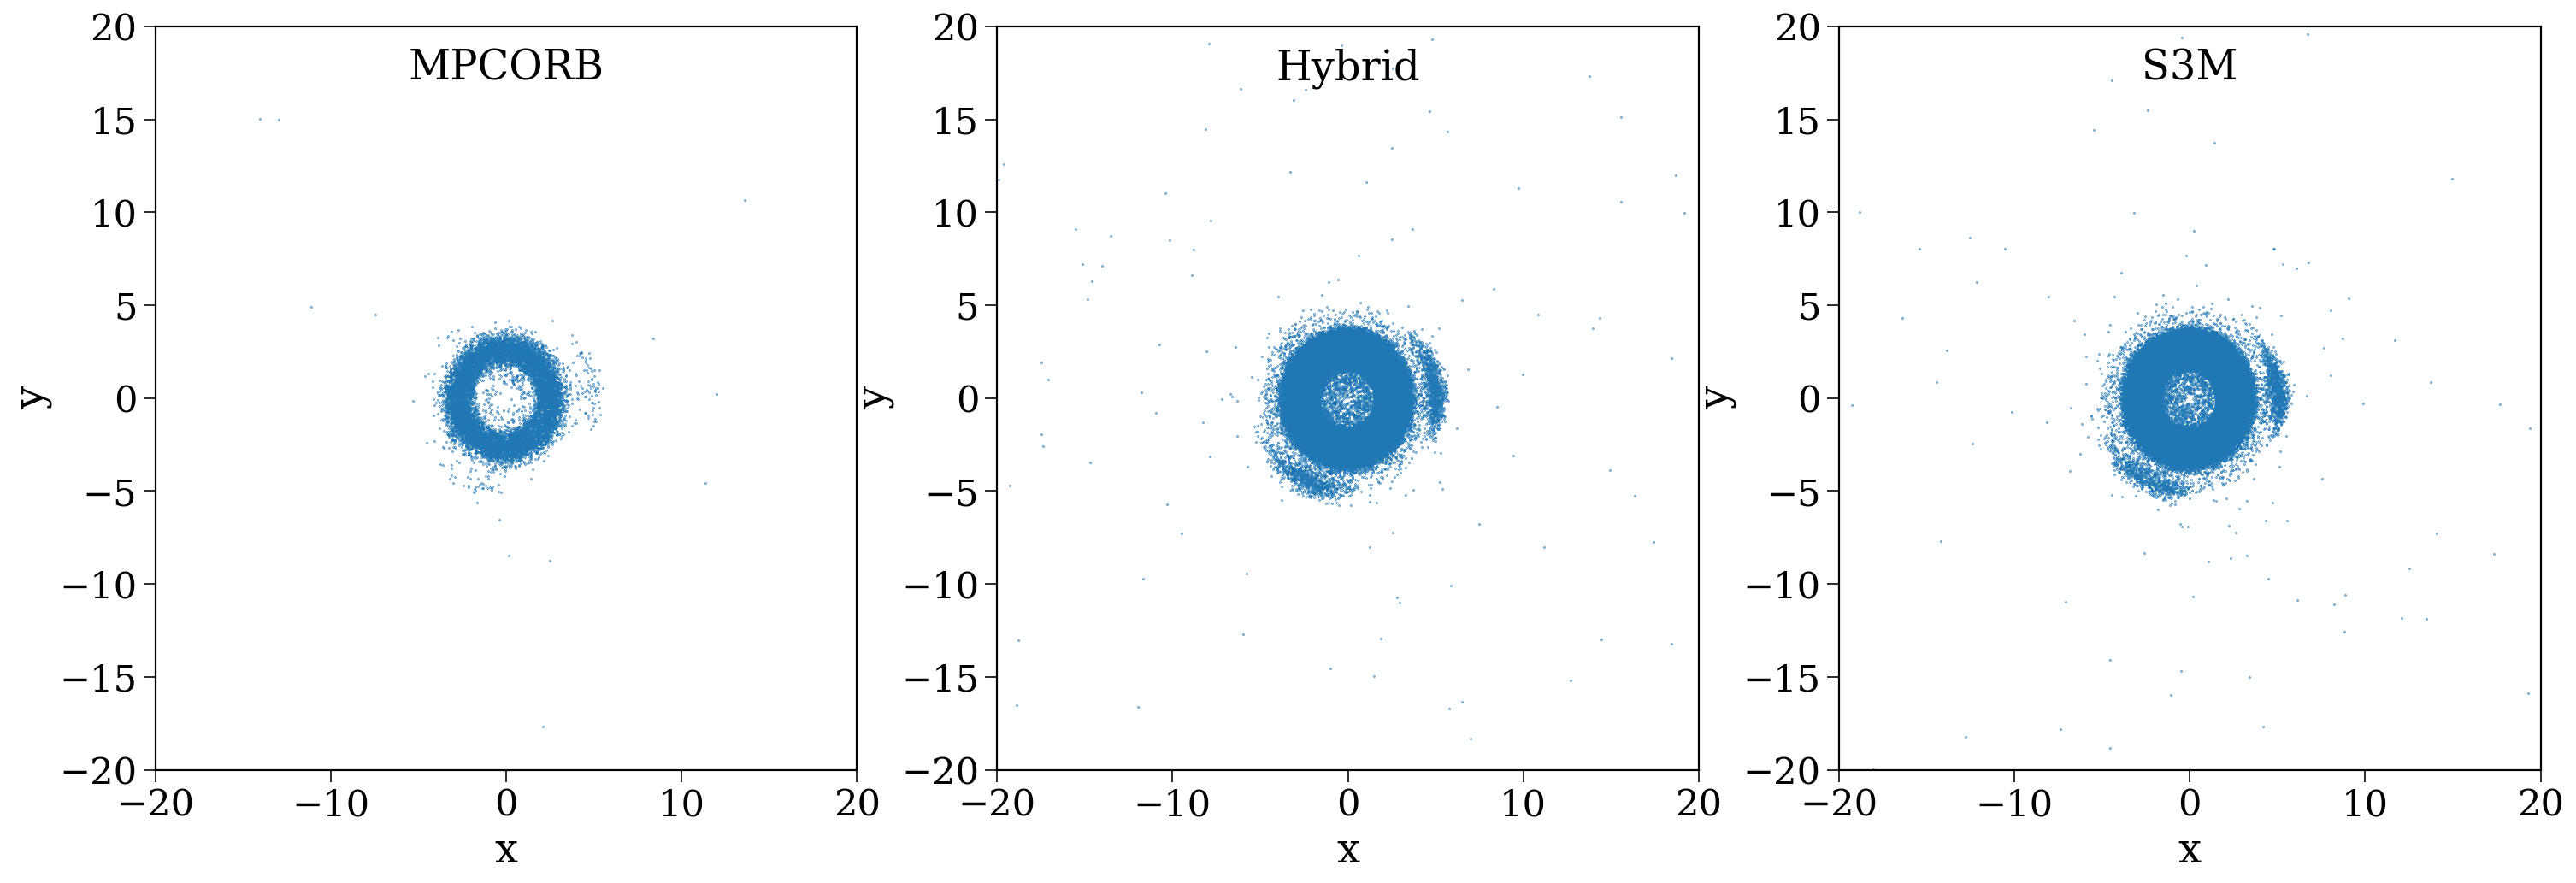

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(25, 8))

for i, cat_label in enumerate(zip([mpcorb, hybrid, s3m], ["MPCORB", "Hybrid", "S3M"])):
    cat, label = cat_label
    axes[i].scatter(cat.x[::100], cat.y[::100], s=0.1)
    axes[i].annotate(label, xy=(0.5, 0.97), xycoords="axes fraction", ha="center", va="top", fontsize=fs)
    
for ax in axes:
    ax.set_xlim(-20, 20)
    ax.set_ylim(-20, 20)
    ax.set_xlabel("x")
    ax.set_ylabel("y")

plt.show()

In [22]:
hybrid

,id,x,y,z,vx,vy,vz,H,g,des,def
0,0.0,1.685402,-0.519250,0.288917,-0.000966,0.013545,-0.000834,10.315,0.15,S0000001a,NaN
1,1.0,3.589601,4.256689,-1.826687,-0.004603,0.001195,0.000856,10.818,0.15,S0000002a,NaN
2,2.0,0.698138,2.743697,0.073753,-0.006140,0.000298,0.001052,11.175,0.15,S0000003a,NaN
3,3.0,-4.465900,-0.579801,1.289574,0.002798,-0.002744,-0.000365,11.452,0.15,S0000004a,NaN
4,4.0,-3.556689,-2.004582,-1.655216,0.002617,-0.003004,-0.000095,11.678,0.15,S0000005a,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1134445,1134445.0,-40.364445,-13.467749,-0.057265,0.000815,-0.002446,0.000631,7.900,0.15,NaN,2021 GU122
1134446,1134446.0,-34.212926,-10.744411,-0.812724,0.000879,-0.002724,-0.000875,8.500,0.15,NaN,2021 GV122
1134447,1134447.0,-39.500016,-12.961634,0.335506,0.000838,-0.002552,0.000009,8.100,0.15,NaN,2021 GW122
1134448,1134448.0,-1.173126,1.641092,0.082128,-0.006586,-0.009178,0.005352,18.900,0.15,NaN,2021 HL3
